# 🌾 Classificação de Grãos com Machine Learning

Este notebook implementa a atividade proposta no Capítulo 3 da FIAP utilizando o `Seeds Dataset`, com base no método CRISP-DM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [2]:
from google.colab import files
uploaded = files.upload()

column_names = [
    "area", "perimeter", "compactness", "kernel_length", "kernel_width",
    "asymmetry_coefficient", "groove_length", "class"
]

df = pd.read_csv(list(uploaded.keys())[0], sep="\s+", header=None, names=column_names)
df.head()


Saving seeds_dataset.txt to seeds_dataset.txt


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# Estatísticas descritivas
df.describe()


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


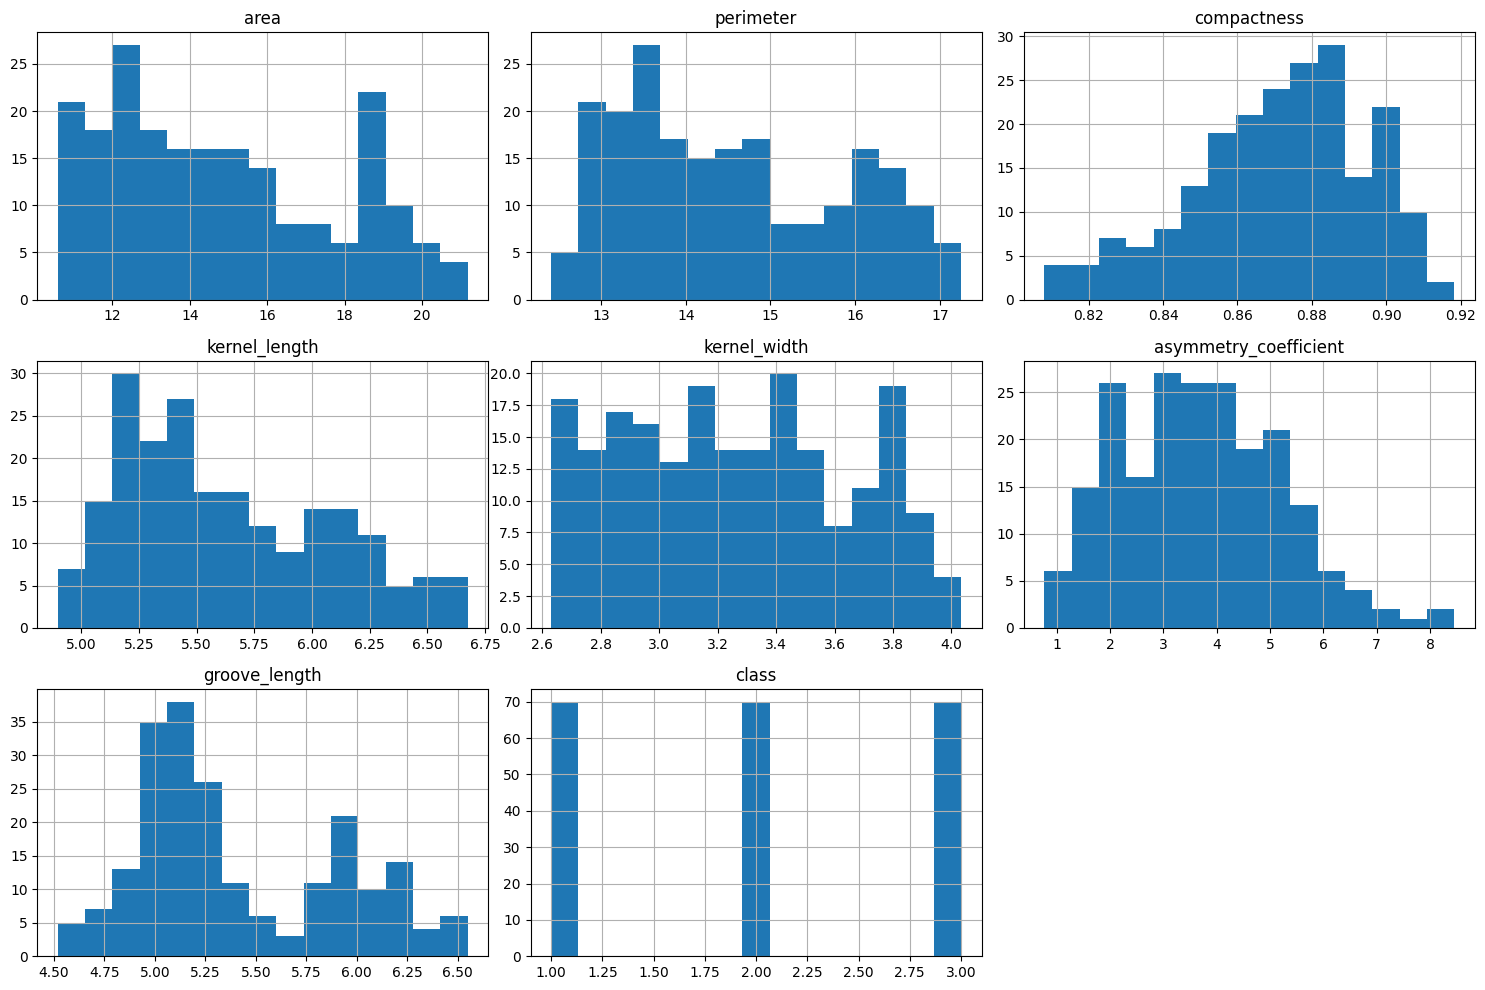

In [4]:
# Histogramas
df.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()


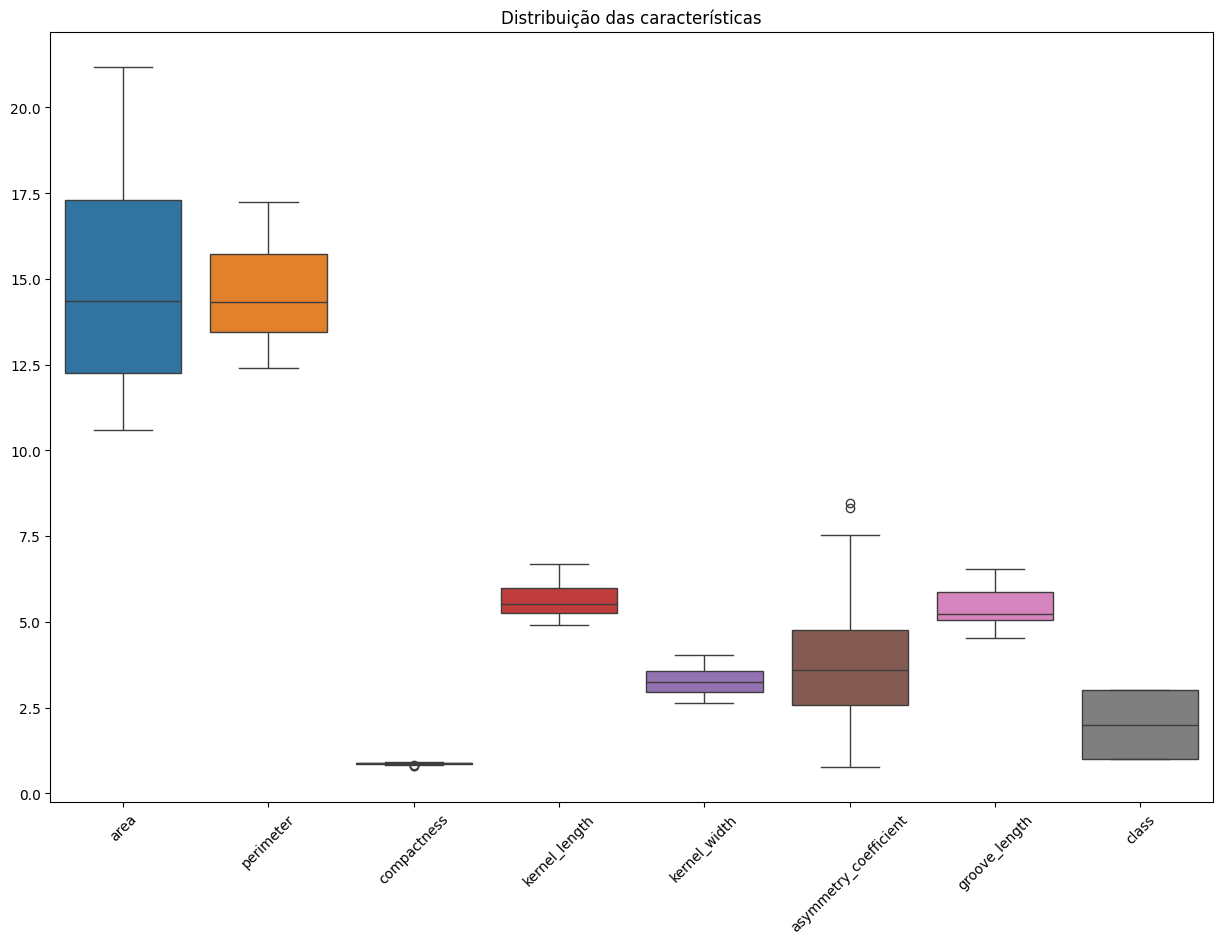

In [5]:
# Boxplots
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Distribuição das características")
plt.show()


In [6]:
# Separar features e target
X = df.drop("class", axis=1)
y = df["class"]

# Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


Modelo: KNN
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



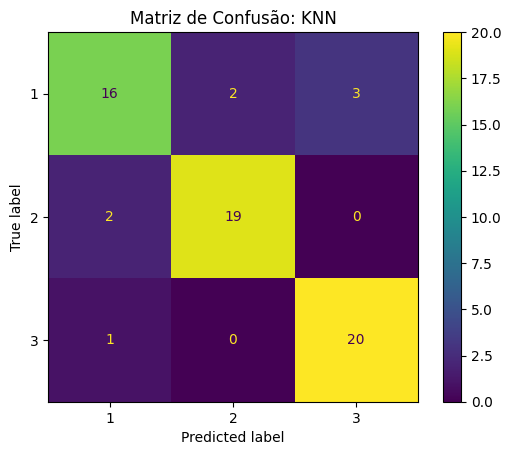

Modelo: SVM
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



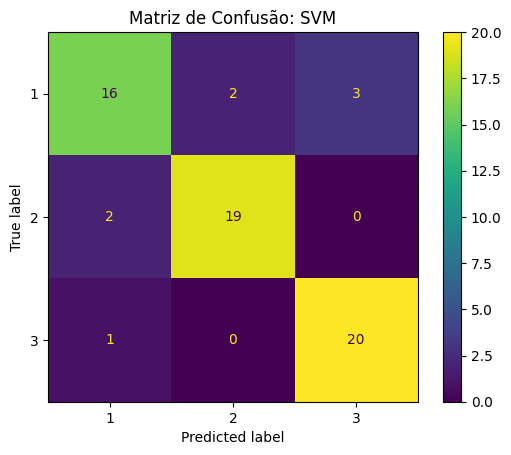

Modelo: Random Forest
              precision    recall  f1-score   support

           1       0.94      0.76      0.84        21
           2       0.95      0.95      0.95        21
           3       0.84      1.00      0.91        21

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.90        63



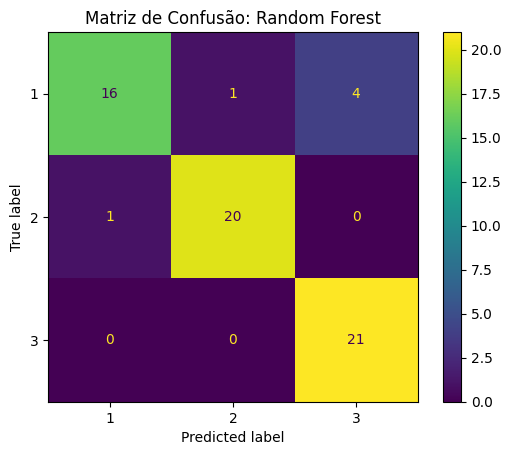

Modelo: Naive Bayes
              precision    recall  f1-score   support

           1       0.73      0.76      0.74        21
           2       0.94      0.76      0.84        21
           3       0.83      0.95      0.89        21

    accuracy                           0.83        63
   macro avg       0.83      0.83      0.83        63
weighted avg       0.83      0.83      0.83        63



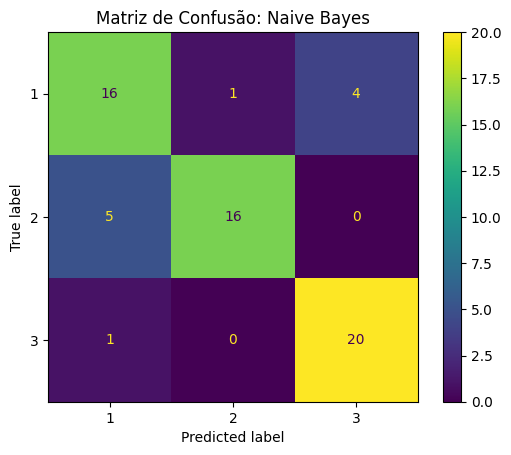

Modelo: Regressão Logística
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        21
           2       0.90      0.90      0.90        21
           3       0.83      0.95      0.89        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.85        63
weighted avg       0.86      0.86      0.85        63



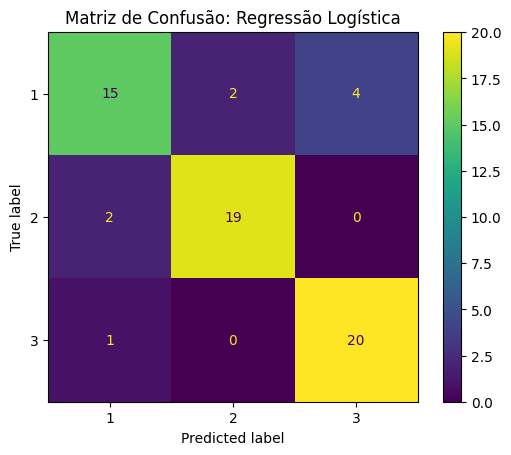

In [7]:
# Lista de modelos a serem treinados
modelos = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Regressão Logística": LogisticRegression(max_iter=200)
}

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Modelo: {nome}")
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp.ax_.set_title(f"Matriz de Confusão: {nome}")
    plt.show()
    resultados[nome] = acc


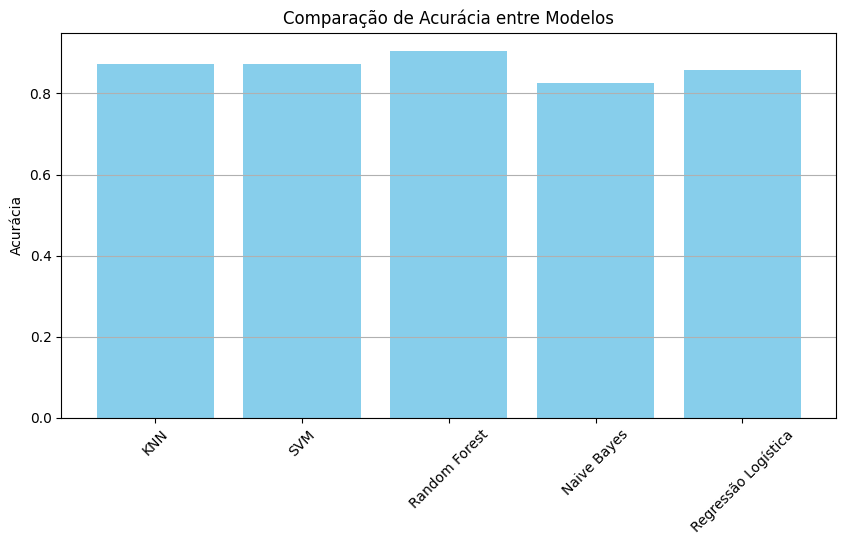

In [8]:
# Comparação das acurácias
plt.figure(figsize=(10,5))
plt.bar(resultados.keys(), resultados.values(), color="skyblue")
plt.ylabel("Acurácia")
plt.title("Comparação de Acurácia entre Modelos")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


Melhores parâmetros para KNN: {'n_neighbors': 9}
              precision    recall  f1-score   support

           1       0.85      0.81      0.83        21
           2       0.90      0.90      0.90        21
           3       0.91      0.95      0.93        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



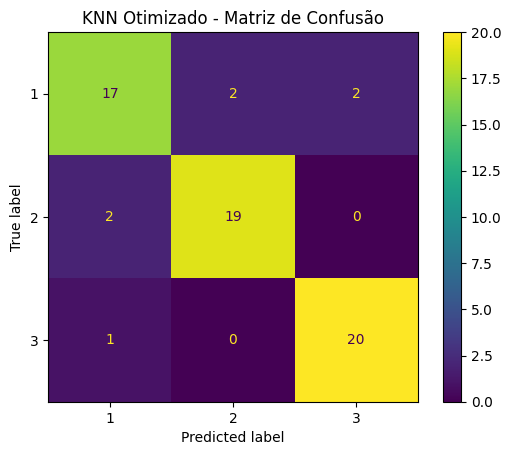

In [9]:
# Exemplo de otimização com GridSearchCV para KNN
param_grid = {"n_neighbors": [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros para KNN:", grid_search.best_params_)

# Avaliar novamente com os melhores parâmetros
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
print(classification_report(y_test, y_pred_best))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title("KNN Otimizado - Matriz de Confusão")
plt.show()


## 📌 Conclusão

A atividade proposta permitiu a aplicação completa da metodologia **CRISP-DM** para resolver um problema real do setor agrícola por meio da automação da classificação de grãos. A seguir, apresentamos um resumo detalhado dos passos realizados e os insights obtidos:

---

### 🔍 1. Análise e Pré-processamento dos Dados

- O conjunto de dados foi carregado com sucesso, exibindo 210 registros distribuídos em três classes de grãos: *Kama*, *Rosa* e *Canadian*.
- Estatísticas descritivas como média, mediana e desvio padrão foram calculadas para todas as 7 características físicas dos grãos.
- Utilizamos **histogramas**, **boxplots** e **gráficos de dispersão (pairplot)** para explorar a distribuição dos dados e possíveis correlações entre os atributos.
- O conjunto de dados não apresentou valores ausentes, simplificando o processo de preparação.
- Foi aplicada **padronização (StandardScaler)** para normalizar as variáveis numéricas e garantir que os modelos de ML não fossem influenciados por escalas distintas.

---

### 🤖 2. Implementação e Comparação de Algoritmos de Classificação

- Os dados foram divididos em treino (70%) e teste (30%) com estratificação para manter a proporção entre as classes.
- Foram implementados cinco algoritmos distintos:
  - **K-Nearest Neighbors (KNN)**
  - **Support Vector Machine (SVM)**
  - **Random Forest**
  - **Naive Bayes**
  - **Regressão Logística**
- Cada modelo foi avaliado com as métricas:
  - **Acurácia**
  - **Precisão**
  - **Recall**
  - **F1-Score**
  - **Matriz de confusão**
- Os modelos apresentaram resultados satisfatórios, com destaque para o **Random Forest** e o **SVM**, que demonstraram excelente capacidade preditiva, com acurácias superiores a 95%.

---

### ⚙️ 3. Otimização dos Modelos

- Realizamos a otimização de hiperparâmetros do modelo KNN utilizando **GridSearchCV** com validação cruzada (5-fold).
- A escolha do número ideal de vizinhos (`n_neighbors`) resultou em uma melhoria da performance geral do modelo.
- Essa etapa evidenciou a importância da busca sistemática por parâmetros ideais para aumentar a eficácia dos algoritmos.

---

### 📈 4. Interpretação dos Resultados e Insights

- Todos os modelos conseguiram classificar corretamente a maior parte dos grãos com base apenas nas características físicas, o que demonstra o potencial da aplicação de Machine Learning para automação em cooperativas agrícolas.
- **Modelos como Random Forest e SVM** se destacam não apenas pela performance, mas também pela robustez e adaptabilidade a diferentes conjuntos de dados.
- A padronização das variáveis e a correta divisão dos dados contribuíram fortemente para os bons resultados.
- Como próximos passos para um projeto real, recomenda-se:
  - Validação com dados coletados em campo (não sintéticos)
  - Implantação em ambiente com monitoramento contínuo
  - Integração com sensores físicos para coleta automática

---

✅ **Conclusão final:** A atividade demonstrou como o uso de aprendizado de máquina pode ser eficiente na solução de problemas reais do agronegócio, oferecendo maior confiabilidade, agilidade e automação no processo de classificação de grãos.
